<a href="https://colab.research.google.com/github/MohamedMOUMOU/students-satisfaction-clustering/blob/master/student_satisfaction_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial data exploration**

In [ ]:
install.packages("readxl")
library("readxl")
original <- read_excel("data.xlsx")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- original

In [ ]:
names(data)

[1] "StudentIdentifier"                                                                                                                                                                                      
 [2] "Your gender:"                                                                                                                                                                                           
 [3] " What is your current academic classification?"                                                                                                                                                         
 [4] "What is your current cumulative GPA? (please answer with N/A if FALL 2022 is your first semester)"                                                                                                      
 [5] "For sure you had an impression about AUI before joining the institution, how is your current feeling about AUI? "                                                                                       
 [6] "Please rate your feeling regarding SSE study experience in comparisons to what you heard about other AUI schools (1-> I am planning to change school, 2 -> I am OK with my school choice, 3 -> I am ..."
 [7] "How satisfied are you with the quality of the food served at AUI?"                                                                                                                                      
 [8] "How satisfied are you with AUI housing facilities?"                                                                                                                                                     
 [9] "How would you rate AUI laboratory facilities?"                                                                                                                                                          
[10] "How would you rate AUI parking facilities?"                                                                                                                                                             
[11] "How would you rate sports and fitness facilities at AUI?"                                                                                                                                               
[12] "How would you rate AUI counseling services?"                                                                                                                                                            
[13] "How would you rate AUI enrollment services? "                                                                                                                                                           
[14] "How you rate the learning environment in the library?"                                                                                                                                                  
[15] "How would you rate the service you get from the health center?"                                                                                                                                         
[16] "How would you rate the academic advising support?"                                                                                                                                                      
[17] "How satisfied are you with the diversity and quality of the clubs and students events?"                                                                                                                 
[18] "How would you rate the help you are getting from the campus staff with administrative and other issues?"                                                                                                
[19] "How would you rate the social life in AUI?"                                                                                                                                                             
[20] "How do you rate the level of safety you feel on campus?"      

In [ ]:
#rename columns for practicability
names(data) = c("id", "gender", "standing", "gpa", "impression", 
"experience_rating", "food", "housing", "lab", "parking", "sports", "counseling", "enrollment", "library", "health_center", "advising", "clubs", "administration",
"social", "safety", "teaching", "crowdedness", "program_variety", 
"schedule_convenience", "knowledge", "issues", "notes")
head(data)

id,gender,standing,gpa,impression,experience_rating,food,housing,lab,parking,⋯,administration,social,safety,teaching,crowdedness,program_variety,schedule_convenience,knowledge,issues,notes
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
student1,Male,Freshman (earned between 0-29 credits),N/A,I am happy to be an AUI student,3,Average Satisfaction,Very Satisfied,Satisfied,Satisfied,⋯,Satisfied,Average Satisfaction,Very Satisfied,Satisfied,Satisfied,Average Satisfaction,Average Satisfaction,Satisfied,Improve the food quality and work on variety;Work on the number of class offerings;Improve the Internet bandwidth;Engage more students in career opportunities;Enforce regulations as it is impossible to study nor work in the library or in a lab. ;,N/A
student2,Male,Junior (earned between 60-89 credits),3.12,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Very Satisfied,Satisfied,⋯,Average Satisfaction,Satisfied,Very Satisfied,Satisfied,Not Satisfied,Average Satisfaction,Satisfied,Average Satisfaction,Students need to live on campus;Improve the food quality and work on variety;Improve the Internet bandwidth;Improve the service quality in the health center;Engage more students in career opportunities;,"We catch colds due to the heating systems In AUI, and also housing is just mediocre at this point."
student3,Male,Junior (earned between 60-89 credits),3.8,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Satisfied,Satisfied,⋯,Average Satisfaction,Average Satisfaction,Very Satisfied,Average Satisfaction,Very Satisfied,Very Satisfied,Very Satisfied,Not Satisfied,Students need to live on campus;Improve the food quality and work on variety;Improve the Internet bandwidth;Engage more students in career opportunities;Reconsider policies used for hiring faculty and staff;,N/
student4,Male,Freshman (earned between 0-29 credits),N/A,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Satisfied,Not Satisfied,⋯,Average Satisfaction,Average Satisfaction,Very Satisfied,Average Satisfaction,Satisfied,Satisfied,Not Satisfied,Satisfied,Improve the food quality and work on variety;Engage more students in career opportunities;Better counseling and follow-up with students' progress;Reconsider policies used for hiring faculty and staff;Work on the number of class offerings;,For my perspective I see that living in campus is like a prison(you can't do a lot of things)
student5,Female,Sophomore (earned between 30-59 credits),3.91,I am happy to be an AUI student,3,Average Satisfaction,Average Satisfaction,Satisfied,Not Satisfied,⋯,Satisfied,Satisfied,Very Satisfied,Satisfied,Average Satisfaction,Average Satisfaction,Satisfied,Satisfied,Improve the food quality and work on variety;Improve the Internet bandwidth;Transparency in decision making ;Reconsider policies used for hiring faculty and staff;Decrease the number of students per section;,Parking Crisis & INCOMPETENT New Faculty!!!!!
student6,Male,Freshman (earned between 0-29 credits),3.6,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Average Satisfaction,Average Satisfaction,⋯,Average Satisfaction,Satisfied,Very Satisfied,Average Satisfaction,Not Satisfied,Satisfied,Average Satisfaction,Average Satisfaction,Students need to live on campus;Improve the food quality and work on variety;Improve the Internet bandwidth;Transparency in decision making ;Reconsider policies used for hiring faculty and staff;,"Aui need to hear the voice of the students, their real voice bot through SGA or surveys"


In [ ]:
# Finding the different values for each column
for(name in names(data)) {
  print(paste("Unique values for: ", name))
  print(unique(data[name]))
}

[1] "Unique values for:  id"
# A tibble: 147 × 1
   id       
   <chr>    
 1 student1 
 2 student2 
 3 student3 
 4 student4 
 5 student5 
 6 student6 
 7 student7 
 8 student8 
 9 student9 
10 student10
# … with 137 more rows
[1] "Unique values for:  gender"
# A tibble: 2 × 1
  gender
  <chr> 
1 Male  
2 Female
[1] "Unique values for:  standing"
# A tibble: 5 × 1
  standing                                
  <chr>                                   
1 Freshman (earned between 0-29 credits)  
2 Junior (earned between 60-89 credits)   
3 Sophomore (earned between 30-59 credits)
4 Senior (number of credits is >=90)      
5 I am a graduate student                 
[1] "Unique values for:  gpa"
# A tibble: 69 × 1
   gpa  
   <chr>
 1 N/A  
 2 3.12 
 3 3.8  
 4 3.91 
 5 3.6  
 6 2.79 
 7 3.84 
 8 3.97 
 9 2.6  
10 2.89 
# … with 59 more rows
[1] "Unique values for:  impression"
# A tibble: 3 × 1
  impression                           
  <chr>                                
1 I am happy to b

We notice that in some columns, such as schedule inconvinience and program vriety, some of the values have white spaces. we should remove those  in the preprocessing step to ensure that all teh columns have the same categories.

In [ ]:
# Dimensions of the dataset
print(paste("Number of rows is:", nrow(data)))
print(paste("Number of cols is:", ncol(data)))

[1] "Number of rows is: 147"
[1] "Number of cols is: 27"


In [ ]:
# missing values
colSums(is.na(data))

id               gender             standing 
                   0                    0                    0 
                 gpa           impression    experience_rating 
                   0                    0                    0 
                food              housing                  lab 
                   0                    0                    0 
             parking               sports           counseling 
                   0                    0                    0 
          enrollment              library        health_center 
                   0                    0                    0 
            advising                clubs       administration 
                   0                    0                    0 
              social               safety             teaching 
                   0                    0                    0 
         crowdedness      program_variety schedule_convenience 
                   0                    0                    0 
           knowledge               issues                notes 
                   0                    0                    3

We notice that the NA values in the GPA column do not appear here because they are considered strings and not NAs.

In [ ]:
#take a look at column details
str(data)

tibble [147 × 27] (S3: tbl_df/tbl/data.frame)
 $ id                  : chr [1:147] "student1" "student2" "student3" "student4" ...
 $ gender              : chr [1:147] "Male" "Male" "Male" "Male" ...
 $ standing            : chr [1:147] "Freshman (earned between 0-29 credits)" "Junior (earned between 60-89 credits)" "Junior (earned between 60-89 credits)" "Freshman (earned between 0-29 credits)" ...
 $ gpa                 : chr [1:147] "N/A" "3.12" "3.8" "N/A" ...
 $ impression          : chr [1:147] "I am happy to be an AUI student" "I am disappointed/upset" "I am disappointed/upset" "I am disappointed/upset" ...
 $ experience_rating   : num [1:147] 3 2 2 2 3 2 2 3 2 3 ...
 $ food                : chr [1:147] "Average Satisfaction" "Not Satisfied" "Not Satisfied" "Not Satisfied" ...
 $ housing             : chr [1:147] "Very Satisfied" "Not Satisfied" "Not Satisfied" "Not Satisfied" ...
 $ lab                 : chr [1:147] "Satisfied" "Very Satisfied" "Satisfied" "Satisfied" ...
 $ pa

We can see that we have only one numerical column whereas the others are characters. This will handled in the encoding step of the preprocessing.

In [ ]:
# Initial data visualization
# Install GGally package
install.packages("GGally")             
library("GGally")  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



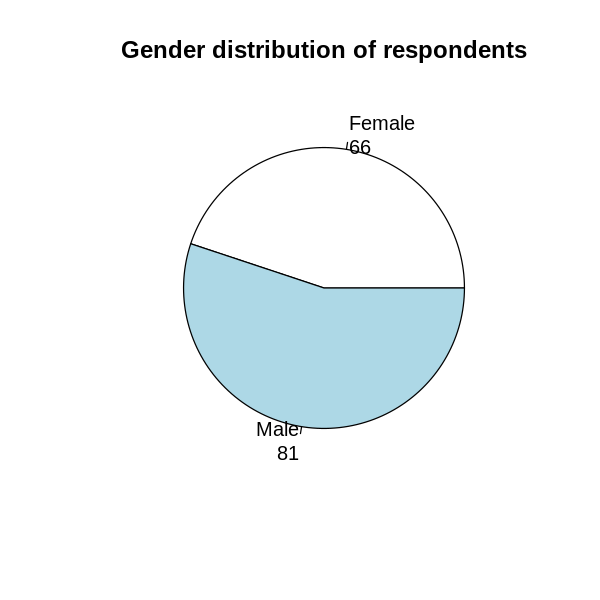

In [ ]:
options(repr.plot.width = 5, repr.plot.height =5)
lbls <- paste(names(table(data$gender)), "\n", table(data$gender), sep="")
pie(table(data$gender), labels = lbls,
   main="Gender distribution of respondents")

We can notice that the male to female ratio is pretty balanced.

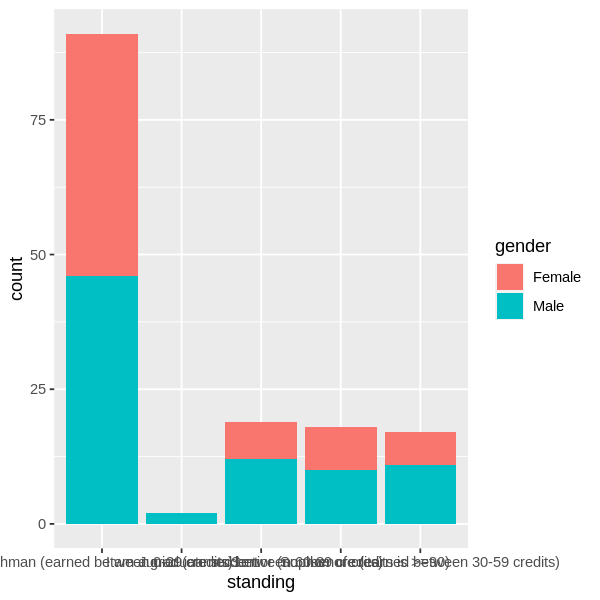

In [ ]:
#Let's look at the gender distribution per standing
ggplot(data, aes(x = standing, fill = gender)) + geom_bar()

We notice that there are no female graduate students, and that the number of graduate students is very low.

In [ ]:
nrow(data[data$standing == "I am a graduate student", ])

[1] 2

We notice that there are only two graduate students in our data. Therefore, we will remove them in the preprocessing stage, since they will not be able to represent their group.

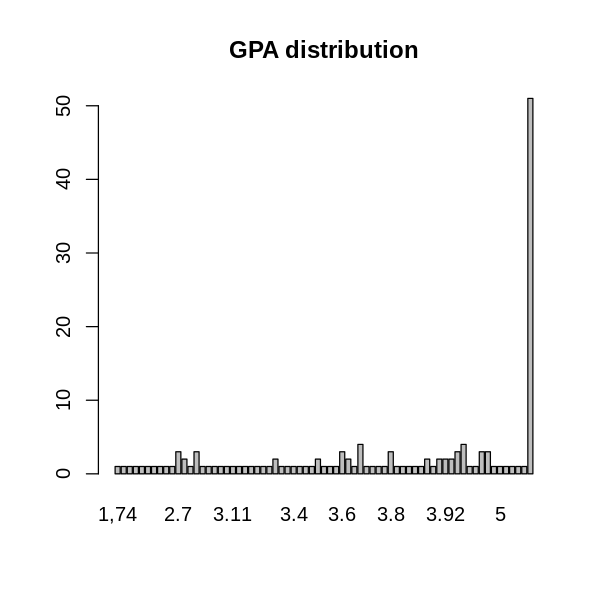

In [ ]:
#let's take a look at GPA distribution of respondents
barplot(table(data$gpa), main  = "GPA distribution")

We can notice that there are a lot of N/A entries, approximately 50, which we will need to impute. 

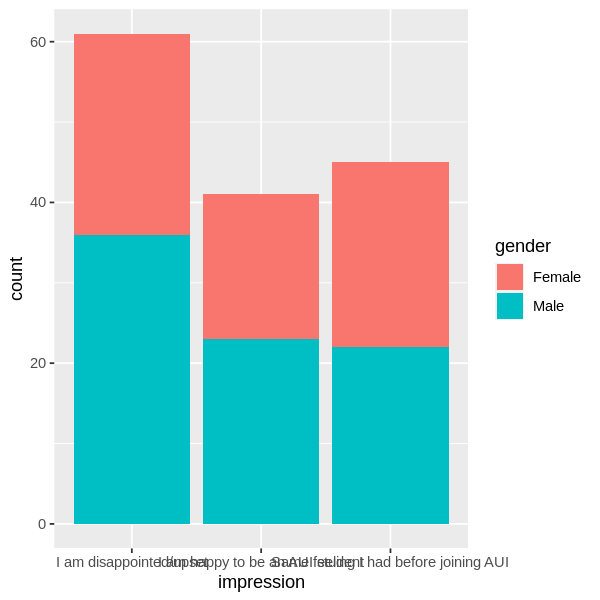

In [ ]:
#let's take a look at the general impression per gender
ggplot(data, aes(x = impression, fill = gender)) + geom_bar()

From the plot above, we can notice that more than one third of the students students are dissapointed. The gender distribution per impression does not show a big imbalance. 

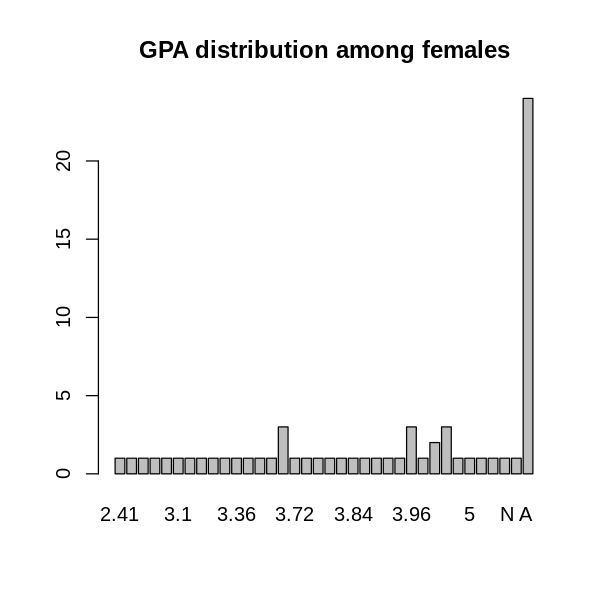

In [ ]:
#let's take a look at the GPA distribution per gender
barplot(table(data[data["gender"] == "Female",]$gpa), main  = "GPA distribution among females")

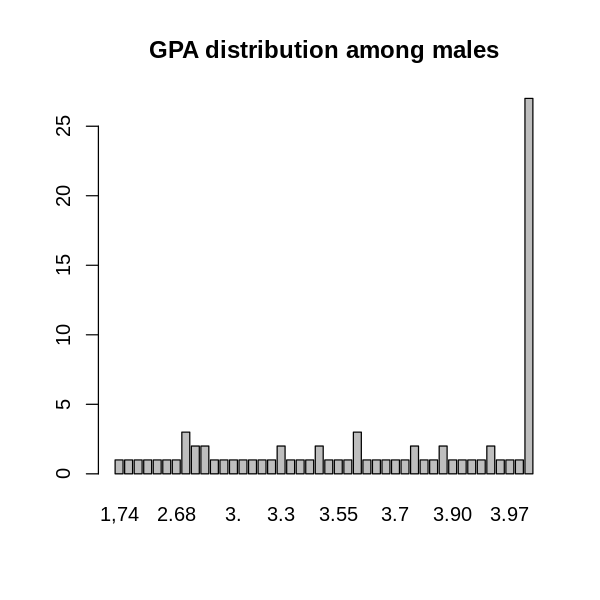

In [ ]:
barplot(table(data[data["gender"] == "Male",]$gpa), main  = "GPA distribution among males")

At first glance, it seems to be that the GPAs of female students are higher than those of males; in range of 2.41 to 4, excluding invalid values, whereas those of males range between 1.74 to 3.96. Further analysis (mean, standard deviation, etc.) can be carried out when the data is preprocessed. 

**Data preprocessing**

In [ ]:
#remove unused columns
data$id <- NULL
data$issues <- NULL
data$notes <- NULL

In [ ]:
# removing graduate students
nrow(data)
data <- data[data$standing != "I am a graduate student",]
nrow(data)

[1] 147

[1] 145

In [ ]:
# converting the gpa column type to numeric and replacing NA values with -999
data$gpa <- as.numeric(data$gpa)
data$gpa[is.na(data$gpa)] <- -999
head(data["gpa"])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


gpa
<dbl>
-999.00
3.12
3.80
-999.00
3.91
3.60


In [ ]:
#removing weird &nbsp characters that appear in columns related to academics
data$teaching <- gsub("^[\u00A0]", "", data$teaching)
data$crowdedness <- gsub("^[\u00A0]", "", data$crowdedness)
data$program_variety <- gsub("^[\u00A0]", "", data$program_variety)
data$schedule_convenience <- gsub("^[\u00A0]", "", data$schedule_convenience)
data$knowledge <- gsub("^[\u00A0]", "", data$knowledge)

In [ ]:
# checking the unique values in the teaching column (they should be 4)
unique(data$teaching)

[1] "Satisfied"            "Average Satisfaction" "Very Satisfied"      
[4] "Not Satisfied"

In [ ]:
#one-hot encoding
install.packages("mltools")
library(mltools)
library(data.table)
data$gender <- as.factor(data$gender)
data$standing <- as.factor(data$standing)
data <- one_hot(as.data.table(data))
data <- as.data.frame(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We performed the one-hot encoding for tre gender and standing column. The one hot-encoding prevents these columns numeric values from signaling a scale.

In [ ]:
# changing the impression's column values to numeric
data["impression"] <- as.numeric(factor(data["impression"][,1], levels = c("I am disappointed/upset","Same feeling I had before joining AUI", "I am happy to be an AUI student")))

In [ ]:
# changing the remaining column values to numeric
for(name in names(data)) {
  if(!is.numeric(data[name][,1])){
    data[name] <- as.numeric(factor(data[name][,1], levels = c("Not Satisfied", "Average Satisfaction","Satisfied","Very Satisfied")));
  }
}
head(data)

,gender_Female,gender_Male,standing_Freshman (earned between 0-29 credits),standing_Junior (earned between 60-89 credits),standing_Senior (number of credits is >=90),standing_Sophomore (earned between 30-59 credits),gpa,impression,experience_rating,food,⋯,advising,clubs,administration,social,safety,teaching,crowdedness,program_variety,schedule_convenience,knowledge
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,0,0,-999.00,3,3,2,⋯,3,4,3,2,4,3,3,2,2,3
2,0,1,0,1,0,0,3.12,1,2,1,⋯,1,4,2,3,4,3,1,2,3,2
3,0,1,0,1,0,0,3.80,1,2,1,⋯,4,1,2,2,4,2,4,4,4,1
4,0,1,1,0,0,0,-999.00,1,2,1,⋯,3,3,2,2,4,2,3,3,1,3
5,1,0,0,0,0,1,3.91,3,3,2,⋯,4,2,3,3,4,3,2,2,3,3
6,0,1,1,0,0,0,3.60,1,2,1,⋯,2,3,2,3,4,2,1,3,2,2


In [ ]:
# scaling of feature
# Z-score scaling (normalizing and centering) is done before Kmeans clustering. The reason for this choice is to make the data exploration (after prepeocessing easier and more interpretable)

**Feature engineering**

In [ ]:
names(data) <- c("female", "male", "freshman", "junior", "senior", "sophomore", names(data[7:length(data)]))
names(data)
length(data)

[1] "female"               "male"                 "freshman"            
 [4] "junior"               "senior"               "sophomore"           
 [7] "gpa"                  "impression"           "experience_rating"   
[10] "food"                 "housing"              "lab"                 
[13] "parking"              "sports"               "counseling"          
[16] "enrollment"           "library"              "health_center"       
[19] "advising"             "clubs"                "administration"      
[22] "social"               "safety"               "teaching"            
[25] "crowdedness"          "program_variety"      "schedule_convenience"
[28] "knowledge"

[1] 28

Many of the criteria present in the table can be reduced into one dimension. For instance, we can have services satisfaction and academic satisfaction.

In [ ]:
#creation new features from aggregations
data["services_satisfaction"] = rowMeans(data[,11:24])
data["academic_satisfaction"] = rowMeans(data[,25:29])
length(data)
head(data)

[1] 30

,female,male,freshman,junior,senior,sophomore,gpa,impression,experience_rating,food,⋯,administration,social,safety,teaching,crowdedness,program_variety,schedule_convenience,knowledge,services_satisfaction,academic_satisfaction
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,0,0,-999.00,3,3,2,⋯,3,2,4,3,3,2,2,3,3.214286,2.642857
2,0,1,0,1,0,0,3.12,1,2,1,⋯,2,3,4,3,1,2,3,2,2.642857,2.128571
3,0,1,0,1,0,0,3.80,1,2,1,⋯,2,2,4,2,4,4,4,1,2.357143,3.071429
4,0,1,1,0,0,0,-999.00,1,2,1,⋯,2,2,4,2,3,3,1,3,2.071429,2.414286
5,1,0,0,0,0,1,3.91,3,3,2,⋯,3,3,4,3,2,2,3,3,2.428571,2.485714
6,0,1,1,0,0,0,3.60,1,2,1,⋯,2,3,4,2,1,3,2,2,2.214286,2.042857


**Data exploration** (after preprocessing)

Now that all our data is numerical, we can conduct further exploration. 

In [ ]:
summary(data)

     female            male           freshman          junior     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :1.0000   Median :1.0000   Median :0.000  
 Mean   :0.4552   Mean   :0.5448   Mean   :0.6276   Mean   :0.131  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
     senior         sophomore           gpa            impression   
 Min.   :0.0000   Min.   :0.0000   Min.   :-999.00   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:-999.00   1st Qu.:1.000  
 Median :0.0000   Median :0.0000   Median :   2.90   Median :2.000  
 Mean   :0.1241   Mean   :0.1172   Mean   :-383.63   Mean   :1.876  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:   3.78   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :  12.00   Max.   :3.000  
 experience_rating      food          hou

We notice that the means of enrollment, food, and health center are the lowest among all other satistfaction criteria.

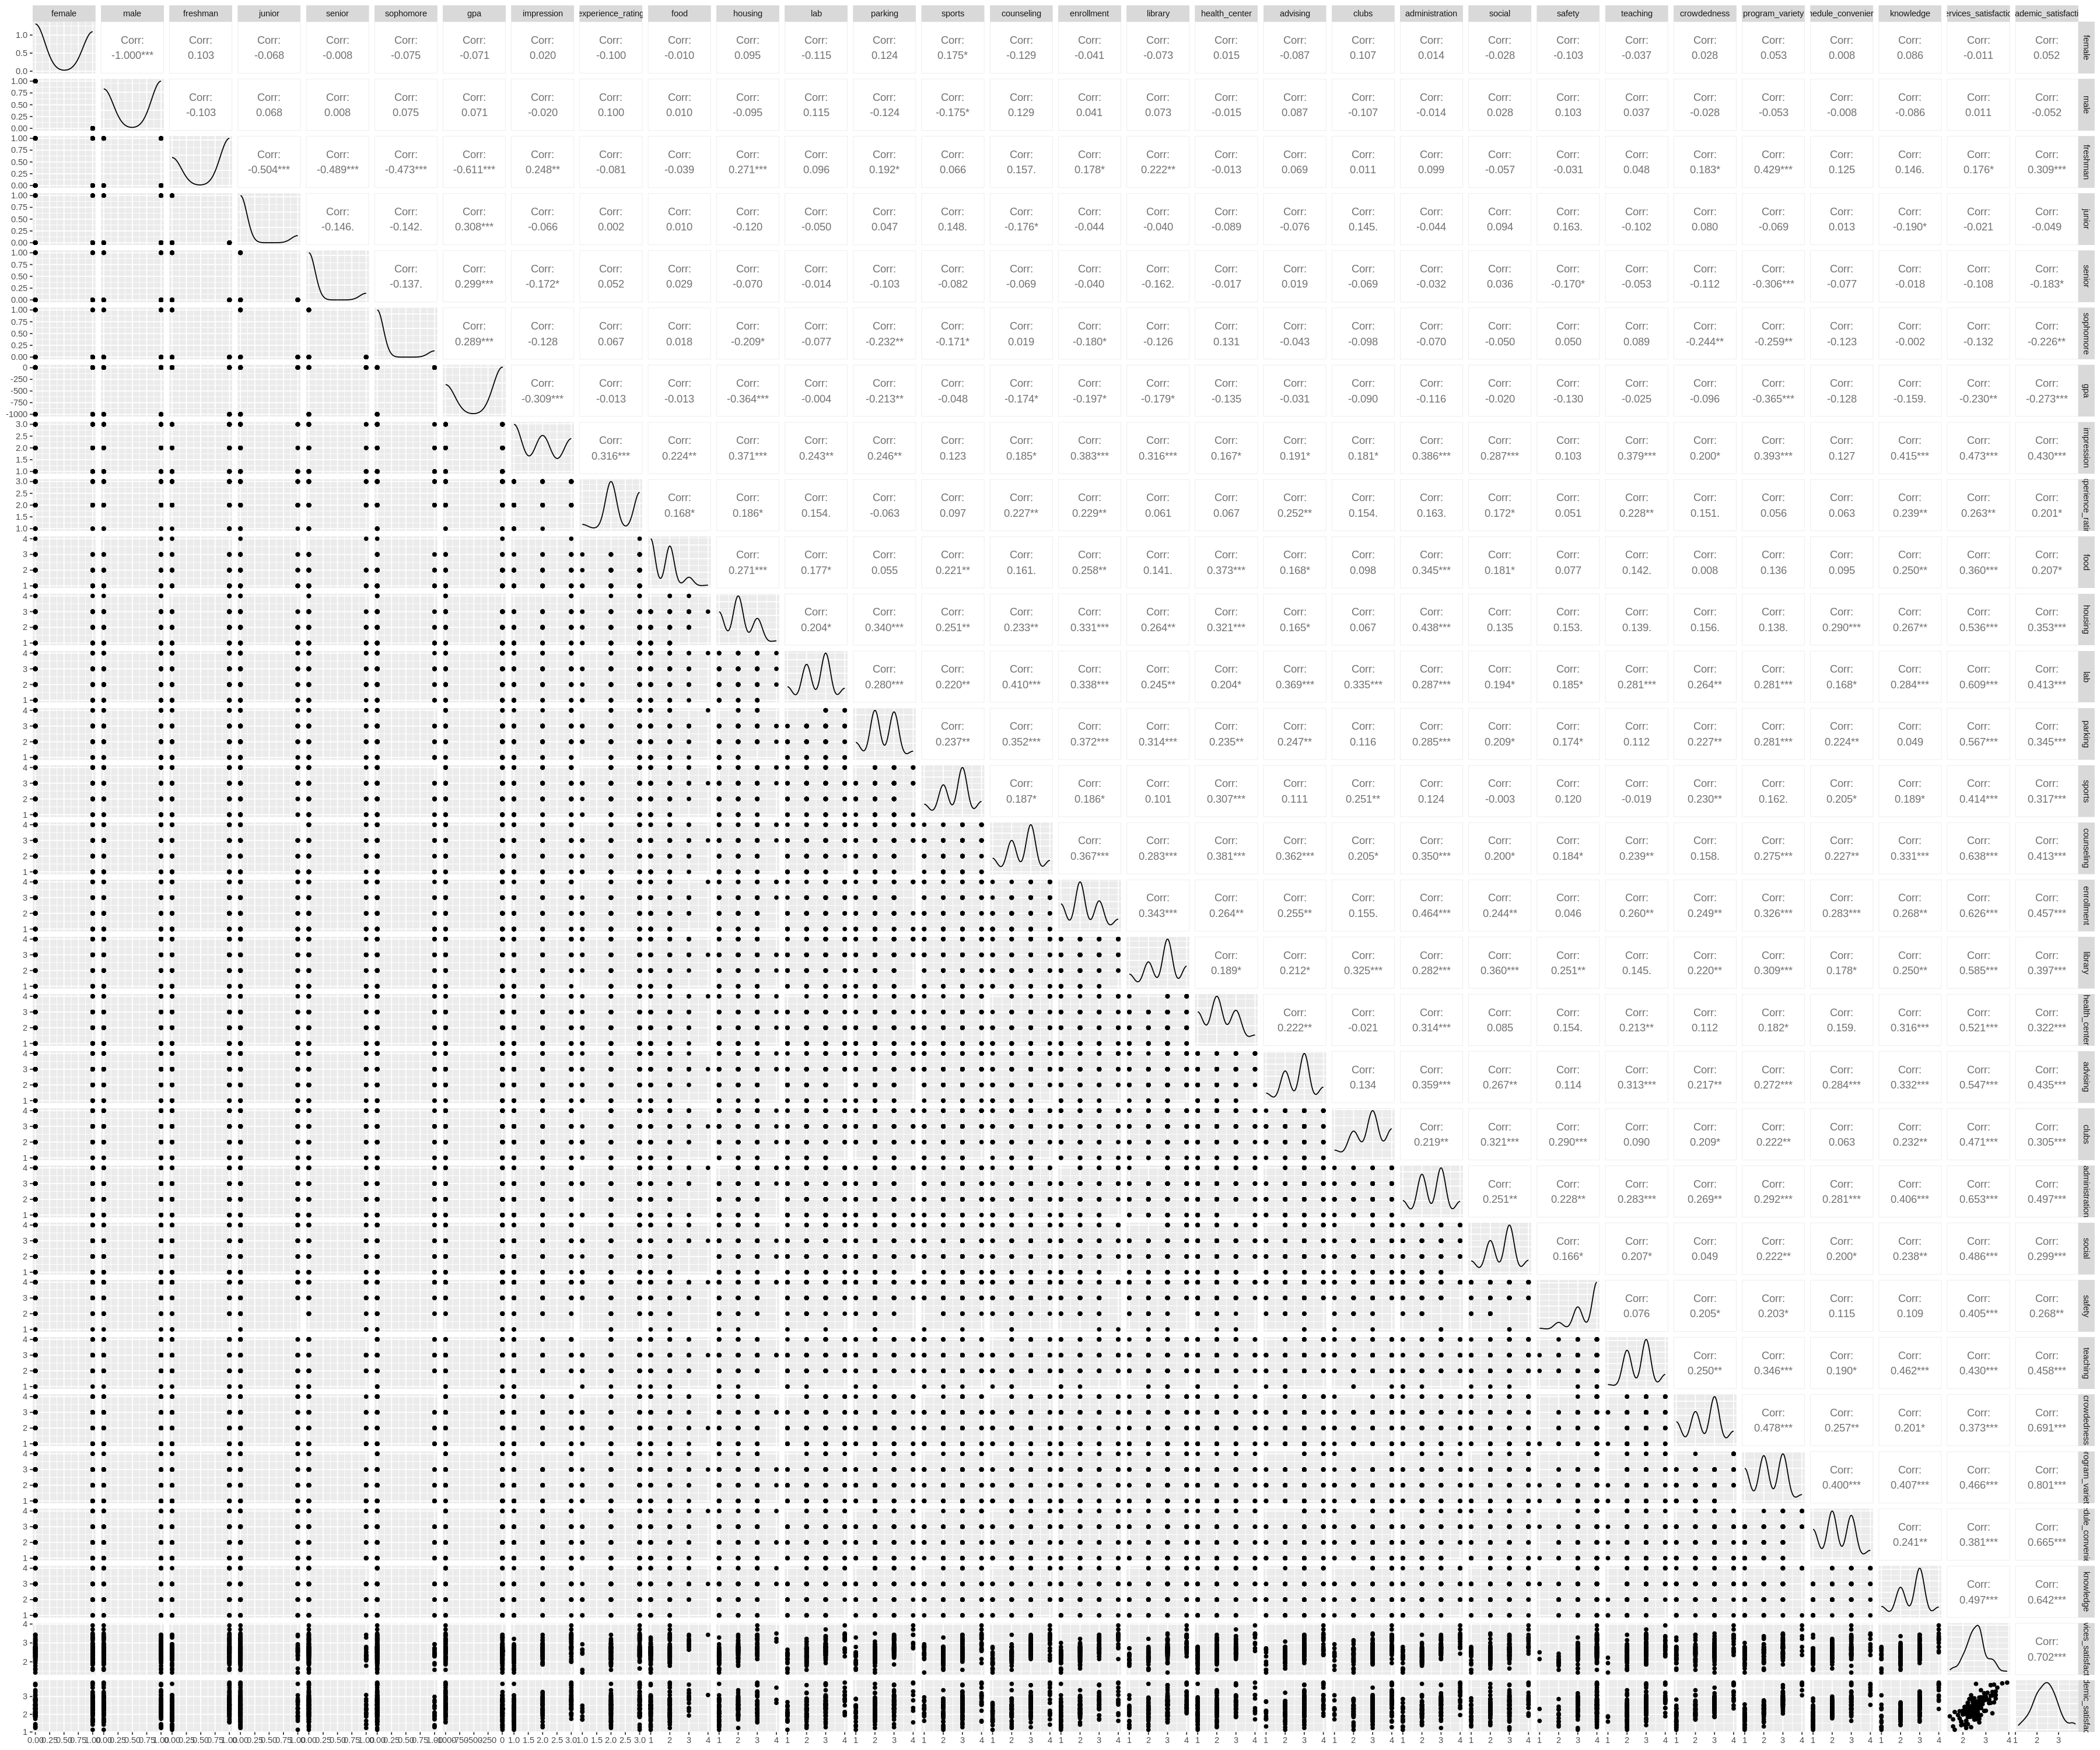

In [ ]:
#let's take a high level view of the data using ggpairs
options(repr.plot.width = 30, repr.plot.height =25)
library(GGally)
ggpairs(data)

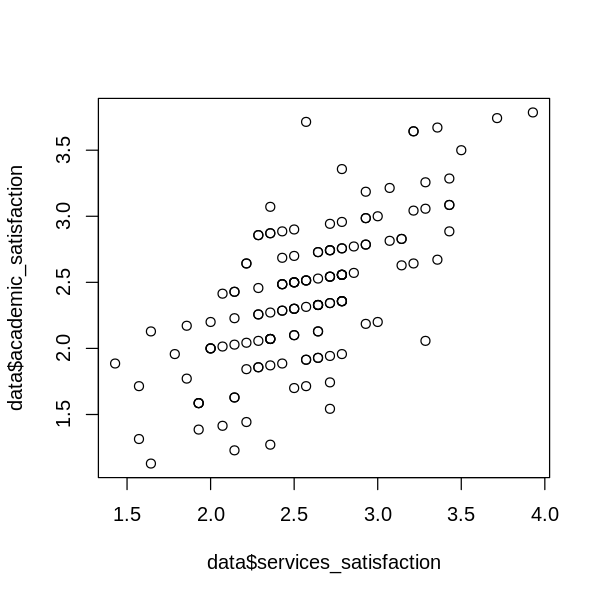

In [ ]:
#plot scatterplot of academic_satisfaction vs services_satisfaction
options(repr.plot.width = 5, repr.plot.height =5)
plot(data$services_satisfaction, data$academic_satisfaction)

From the graph above we can notice a few strong correlations: 


*   gpa is highly correlated with freshman; this makes sense because most freshmen were assigned the same dummy gpa
*   The correlation between services_satisfaction and academic satisfaction is quite high


*   Otherwise, the other correlations are not that strong


*   Analyzing the correlations with the variable impression may give indicators as to what factors impact students' general impression the most (these seem to be knowledge, program variety, administration, and enrollment)












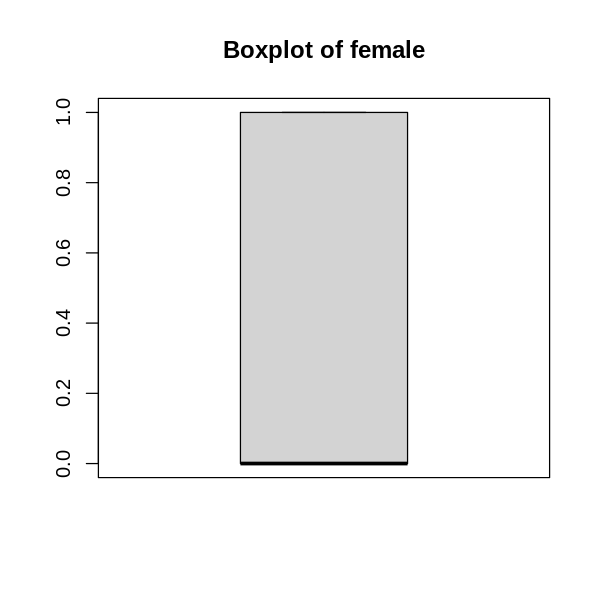

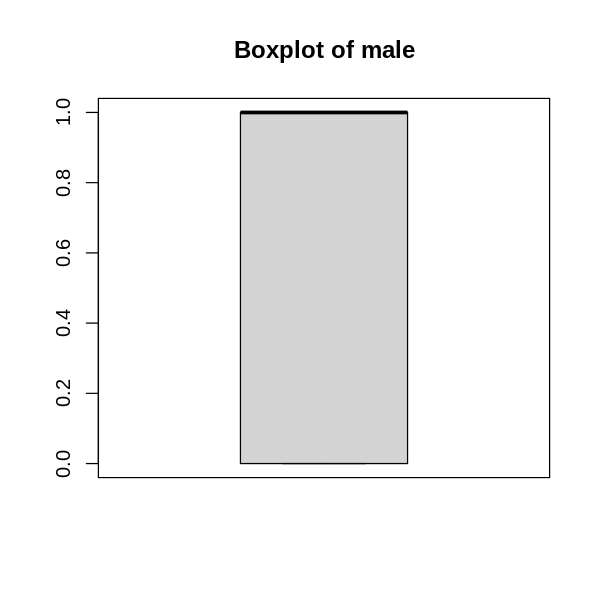

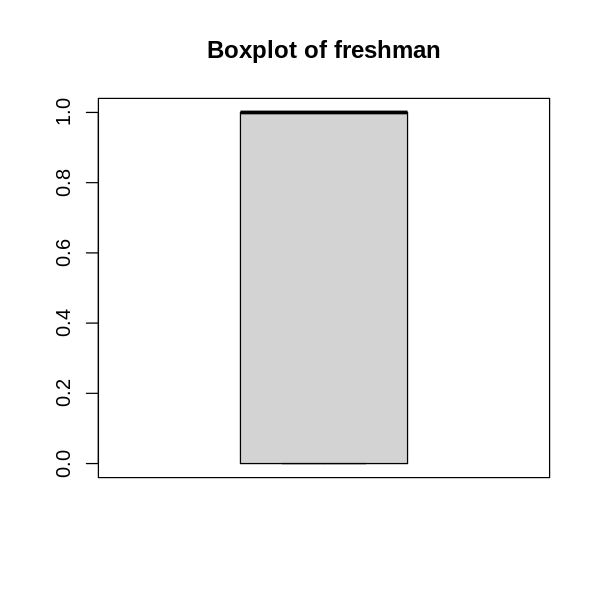

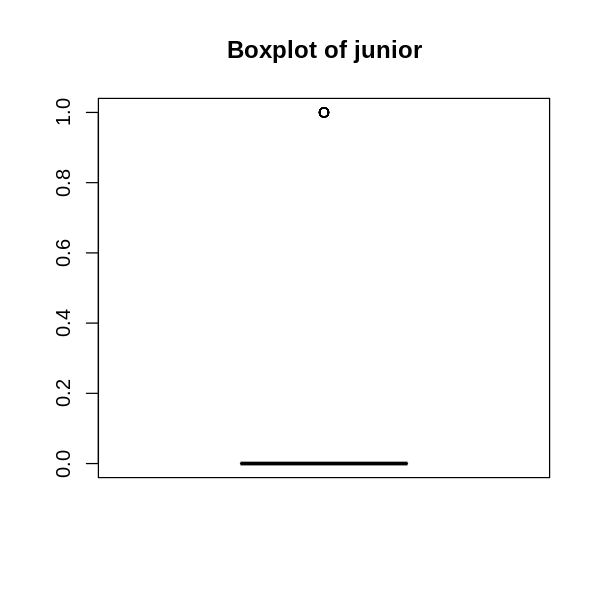

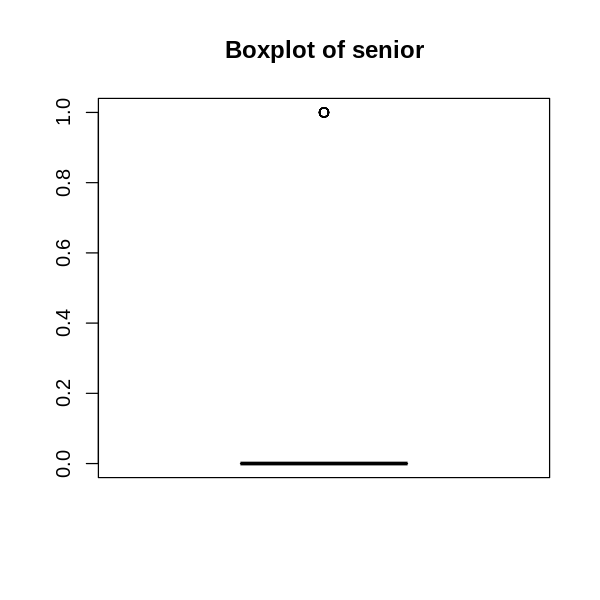

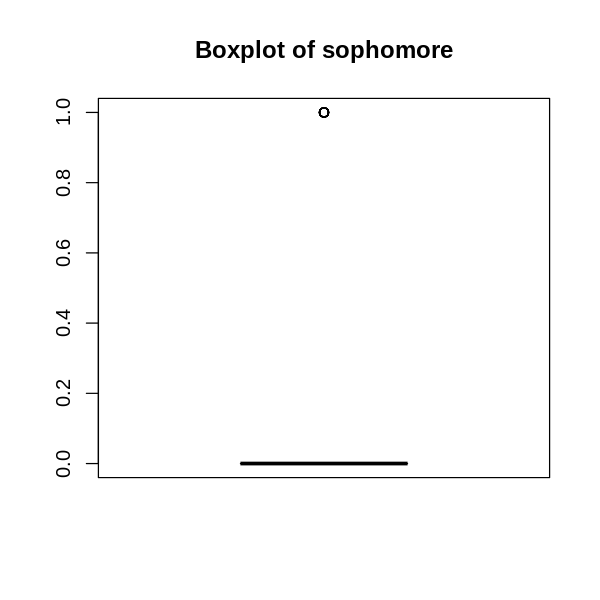

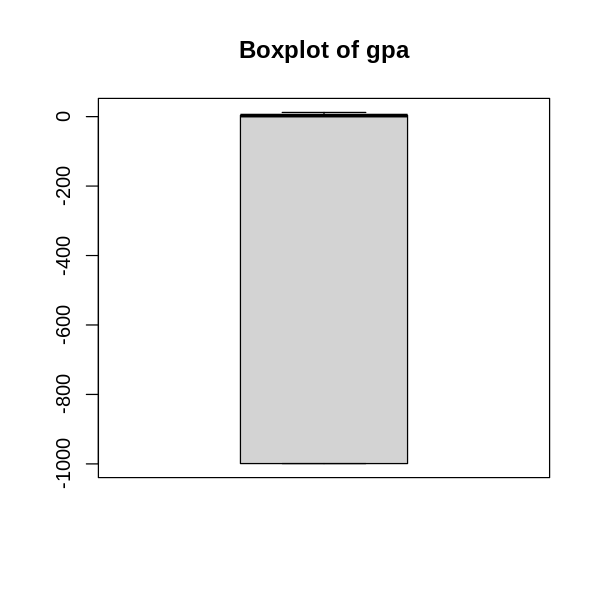

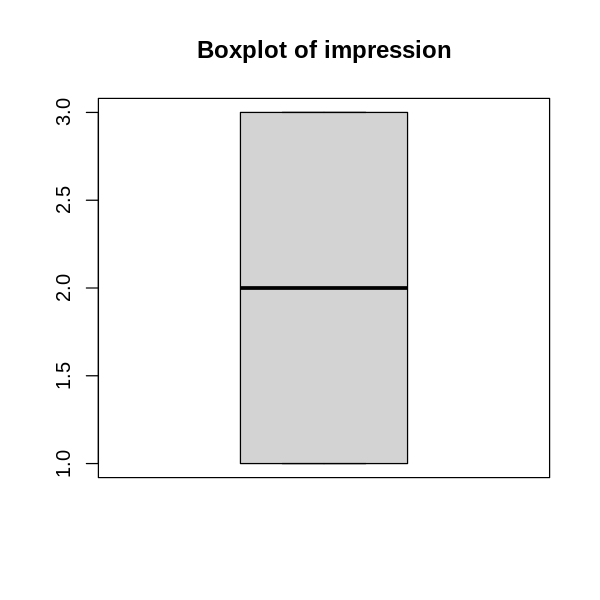

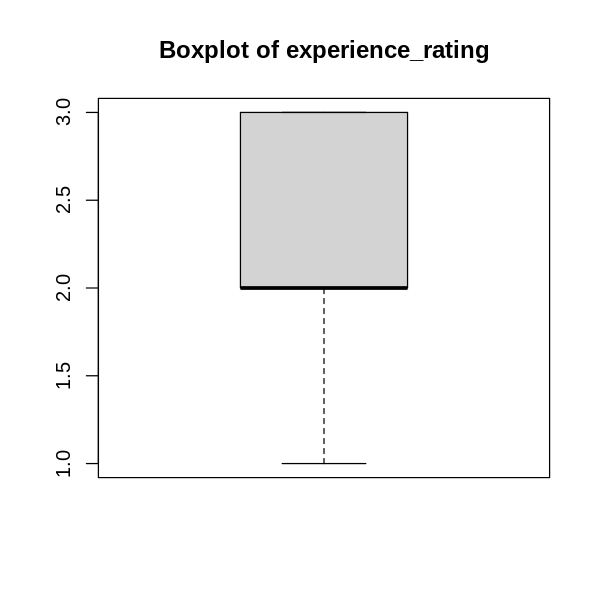

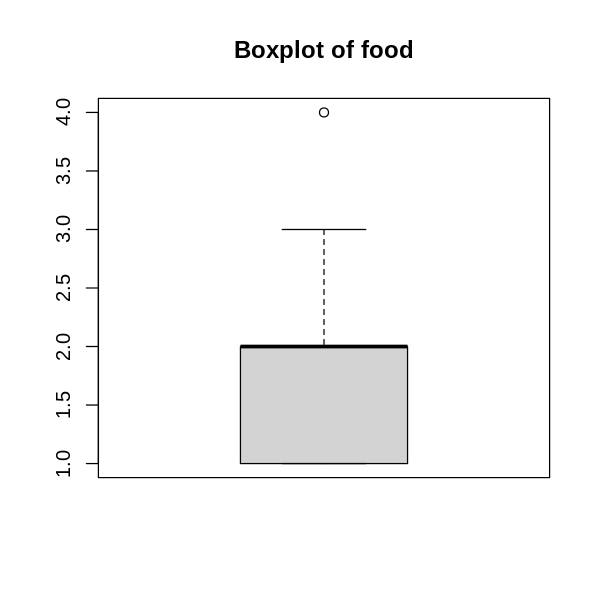

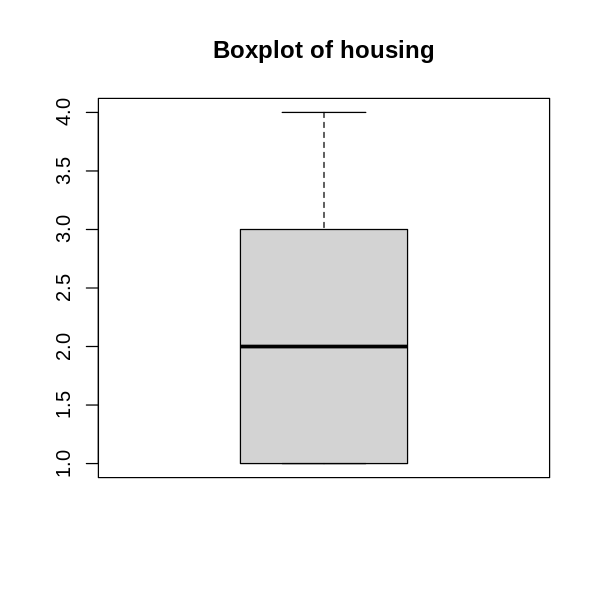

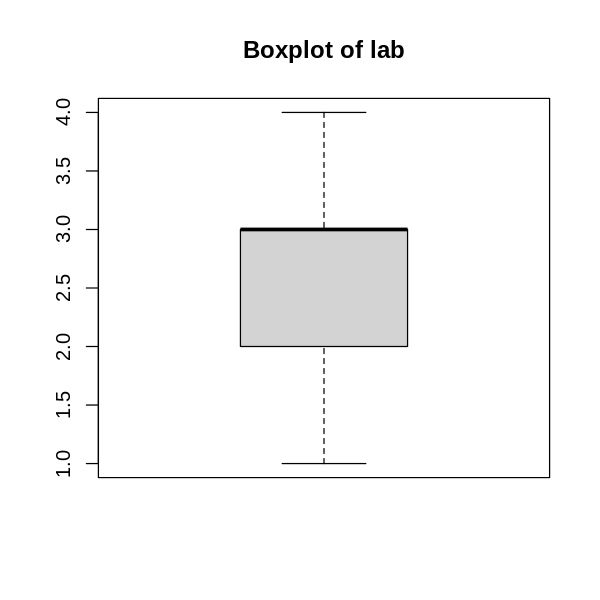

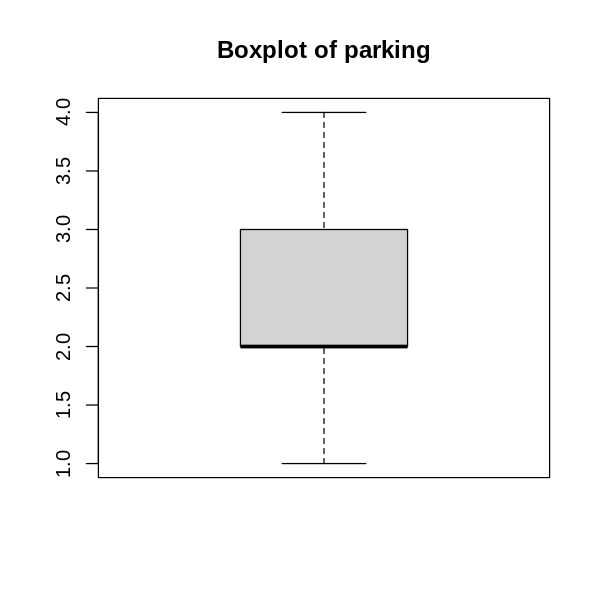

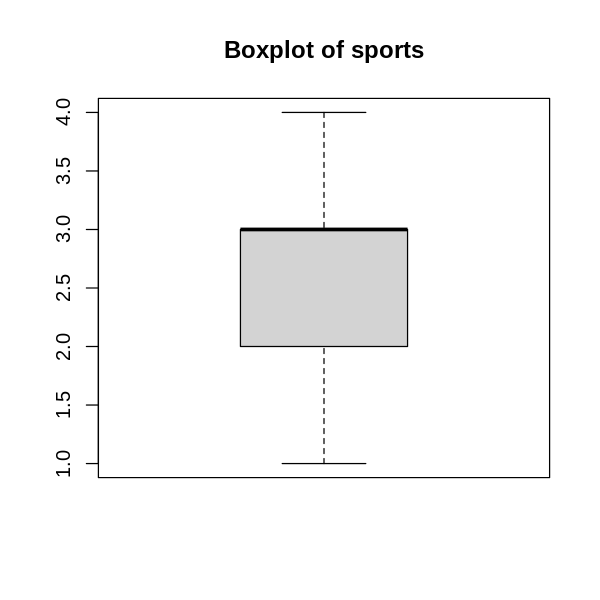

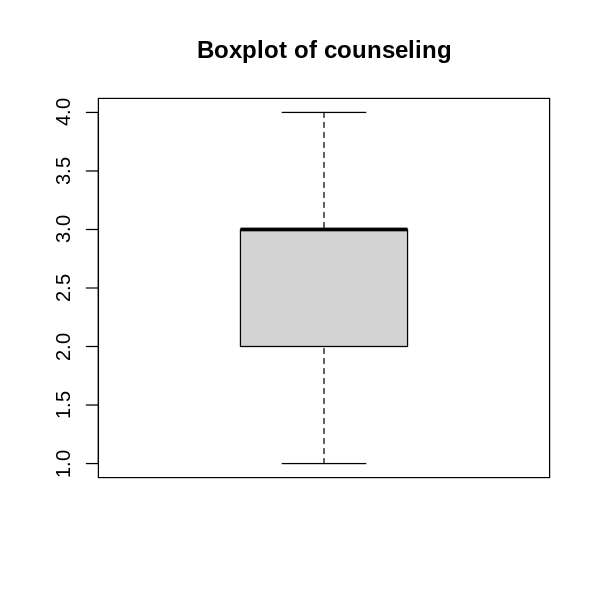

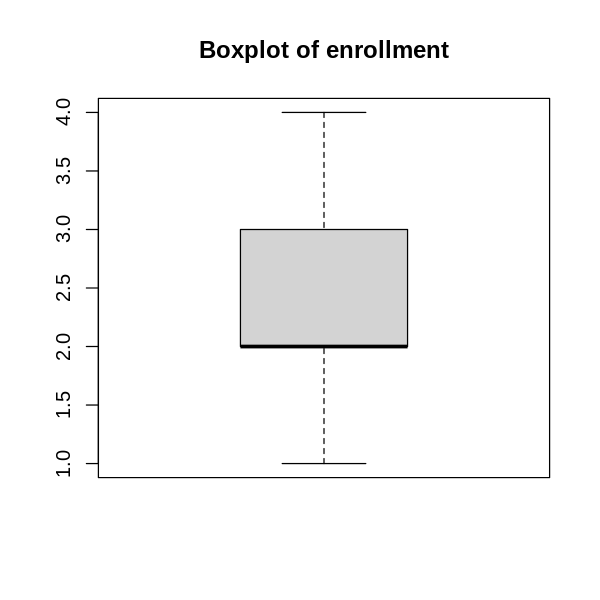

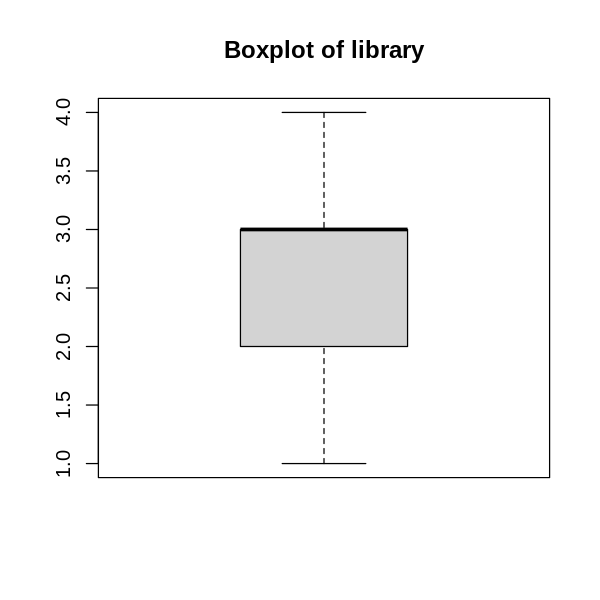

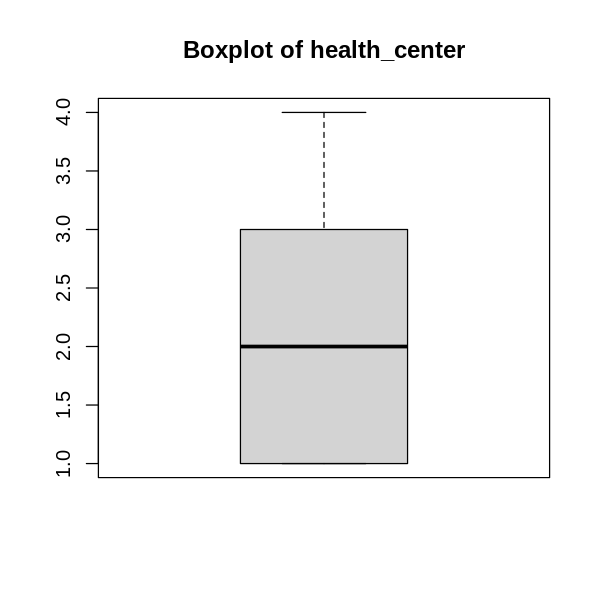

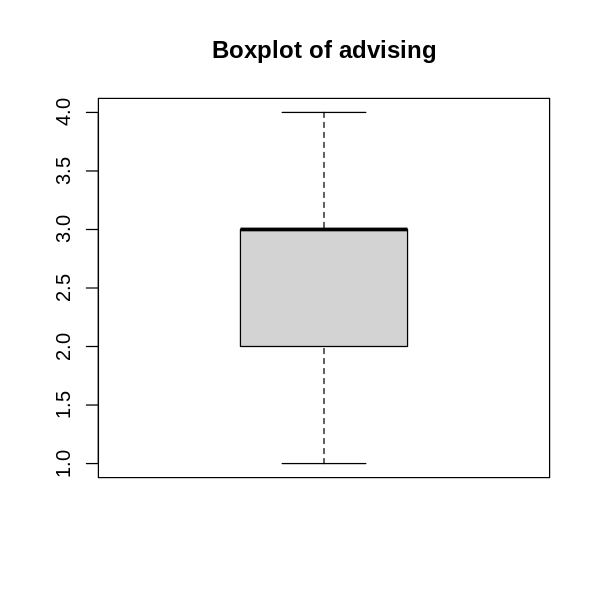

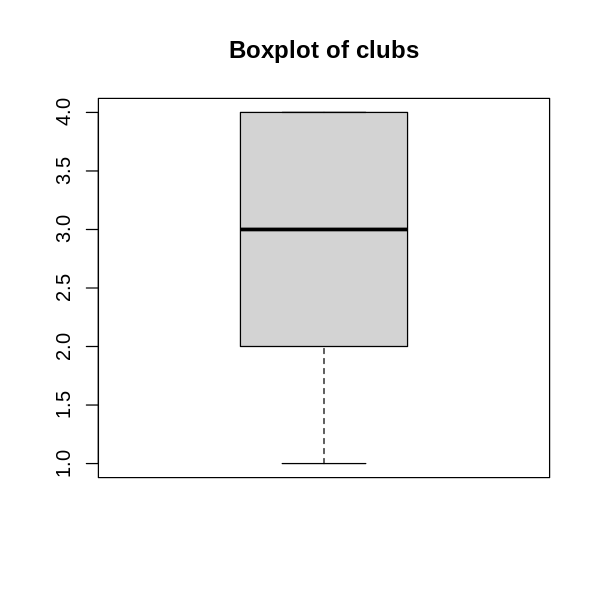

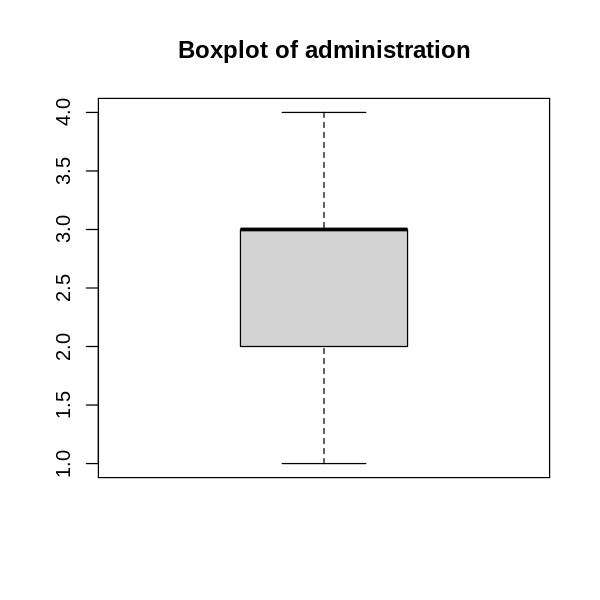

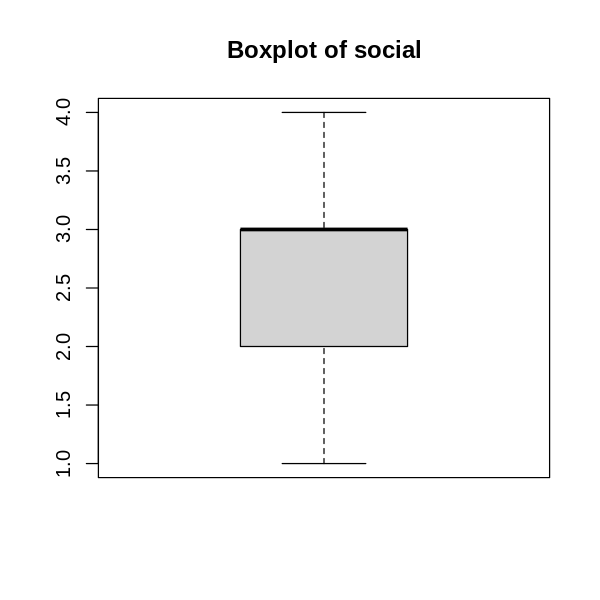

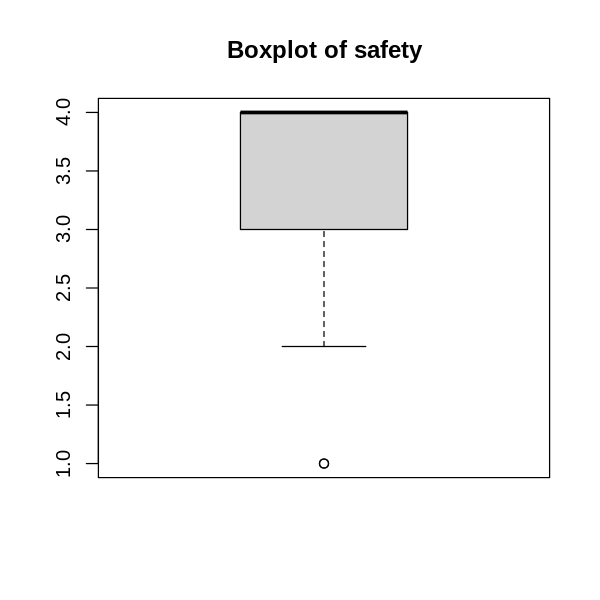

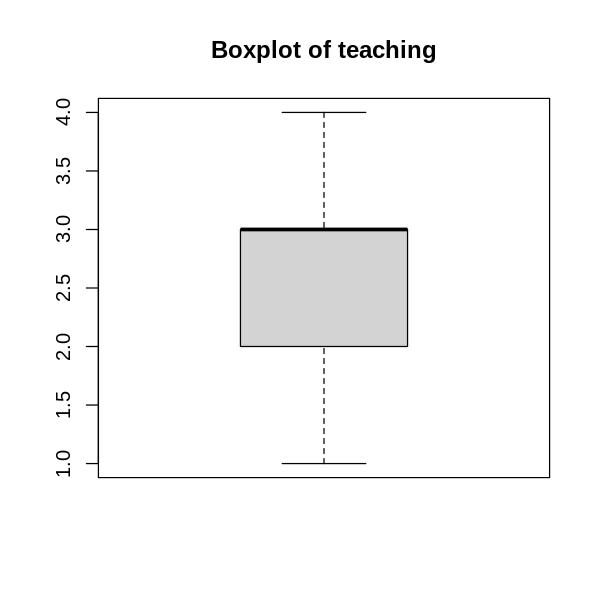

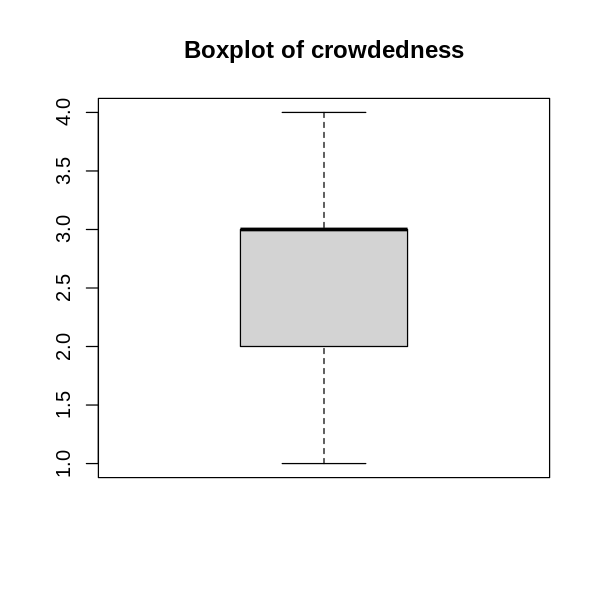

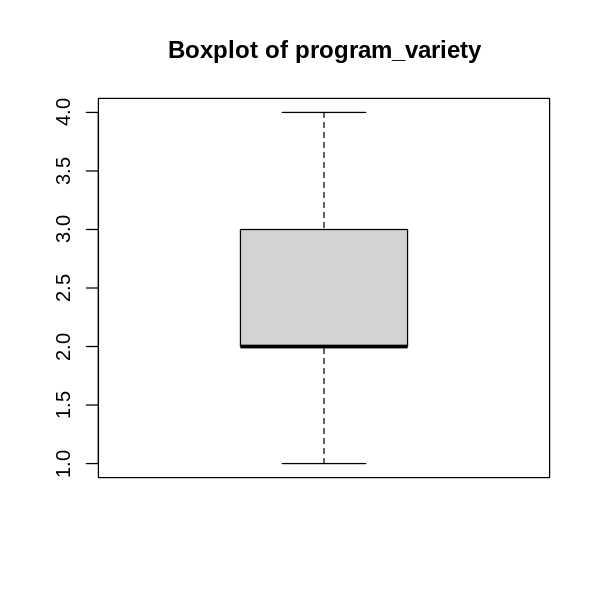

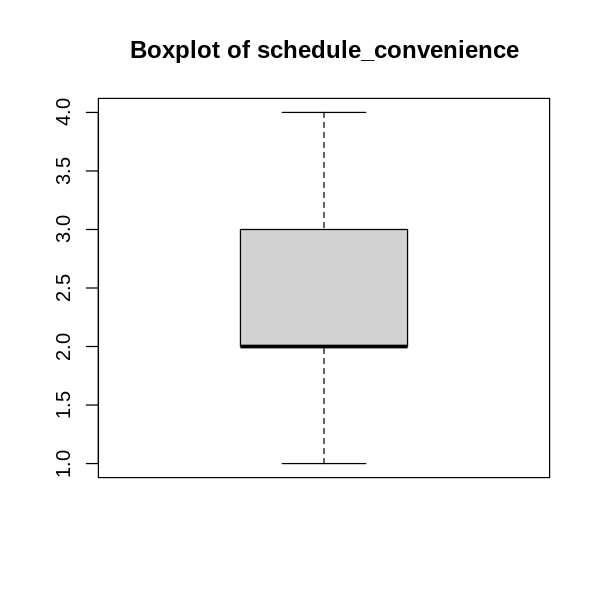

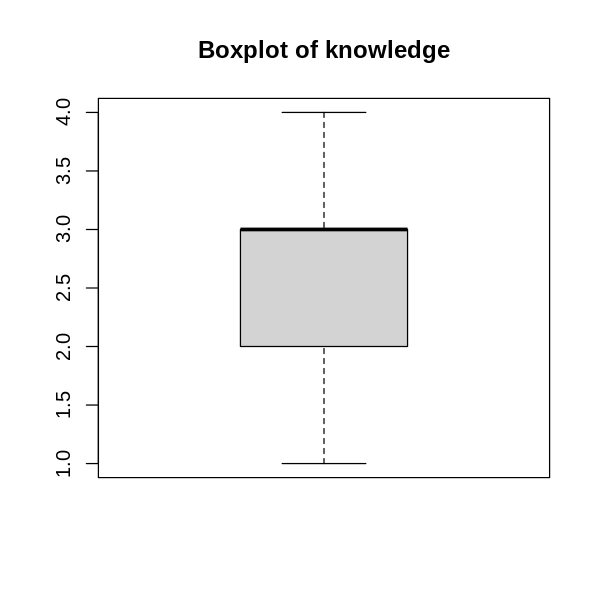

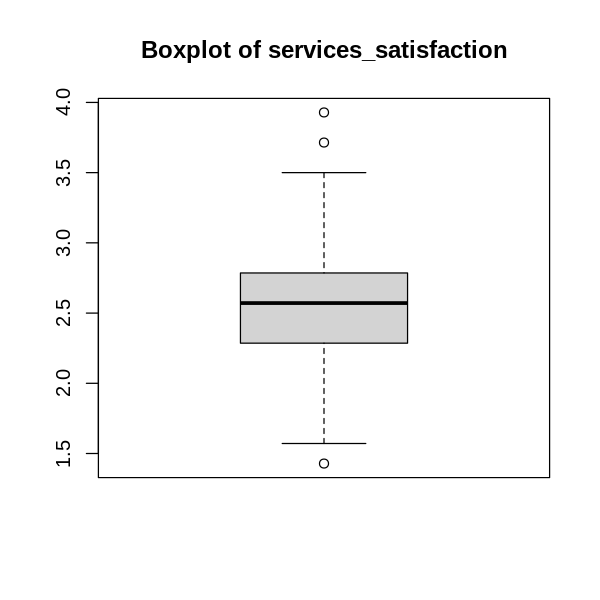

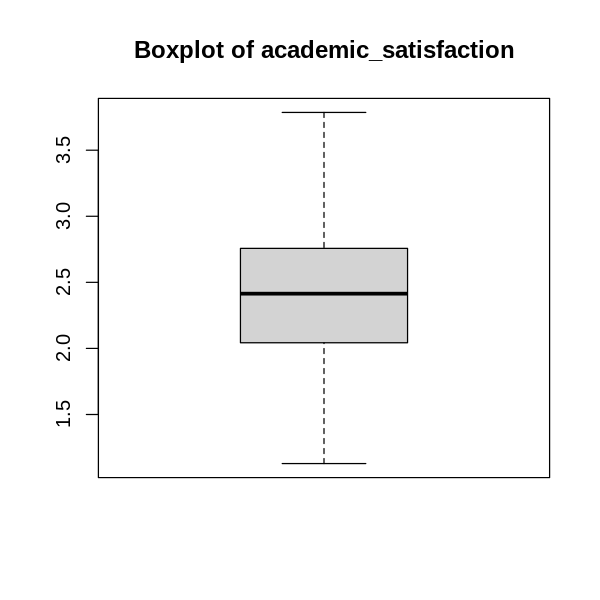

In [ ]:
#let's plot boxplots which give a holistic summary of data
names <- names(data)
for (name in names){
  boxplot(data[name], main  = paste("Boxplot of", name))
}

The boxplots indicate that we have outliers in the last two columns, service_satisfaction and academic_satisfaction, however, there aren't that many, only 4 points and 1 point respectively. 

**Feature selection**

In [ ]:
names(data)

[1] "female"                "male"                  "freshman"             
 [4] "junior"                "senior"                "sophomore"            
 [7] "gpa"                   "impression"            "experience_rating"    
[10] "food"                  "housing"               "lab"                  
[13] "parking"               "sports"                "counseling"           
[16] "enrollment"            "library"               "health_center"        
[19] "advising"              "clubs"                 "administration"       
[22] "social"                "safety"                "teaching"             
[25] "crowdedness"           "program_variety"       "schedule_convenience" 
[28] "knowledge"             "services_satisfaction" "academic_satisfaction"

In [ ]:
features <- data[, c("freshman", "junior", "senior", "sophomore", "gpa", "impression", "experience_rating", "services_satisfaction", "academic_satisfaction")]

We remove the gender features since we do not want our analysis to be biased towards gender. Also, it is worth mentioning, that we tried the clustering with genders, and it splits the clusters across genders without any other differentiation.

In [ ]:
names(data)

[1] "female"                "male"                  "freshman"             
 [4] "junior"                "senior"                "sophomore"            
 [7] "gpa"                   "impression"            "experience_rating"    
[10] "food"                  "housing"               "lab"                  
[13] "parking"               "sports"                "counseling"           
[16] "enrollment"            "library"               "health_center"        
[19] "advising"              "clubs"                 "administration"       
[22] "social"                "safety"                "teaching"             
[25] "crowdedness"           "program_variety"       "schedule_convenience" 
[28] "knowledge"             "services_satisfaction" "academic_satisfaction"

**Kmeans clustering**

In [ ]:
install.packages("factoextra")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Standard deviations (1, .., p=9):
[1] 1.708926e+00 1.295084e+00 1.081434e+00 1.068308e+00 8.872103e-01
[6] 7.498455e-01 6.817519e-01 5.266433e-01 3.274685e-16

Rotation (n x k) = (9 x 9):
                             PC1        PC2          PC3          PC4
freshman              -0.4432879 -0.4476009  0.001298721  0.003227305
junior                 0.1741572  0.3406490  0.729235883  0.199966660
senior                 0.2391548  0.1658524 -0.221368702 -0.781291144
sophomore              0.2383550  0.1453362 -0.539949629  0.586201225
gpa                    0.4105997  0.2948276  0.047243690 -0.002331012
impression            -0.3785539  0.2873512 -0.093766007  0.050782908
experience_rating     -0.1288773  0.4575512 -0.329247556 -0.020089992
services_satisfaction -0.3876012  0.4078750  0.009774208 -0.036511795
academic_satisfaction -0.4247561  0.2996212  0.090222604 -0.040424445
                              PC5         PC6         PC7           PC8
freshman              -0.08136162 -0.211

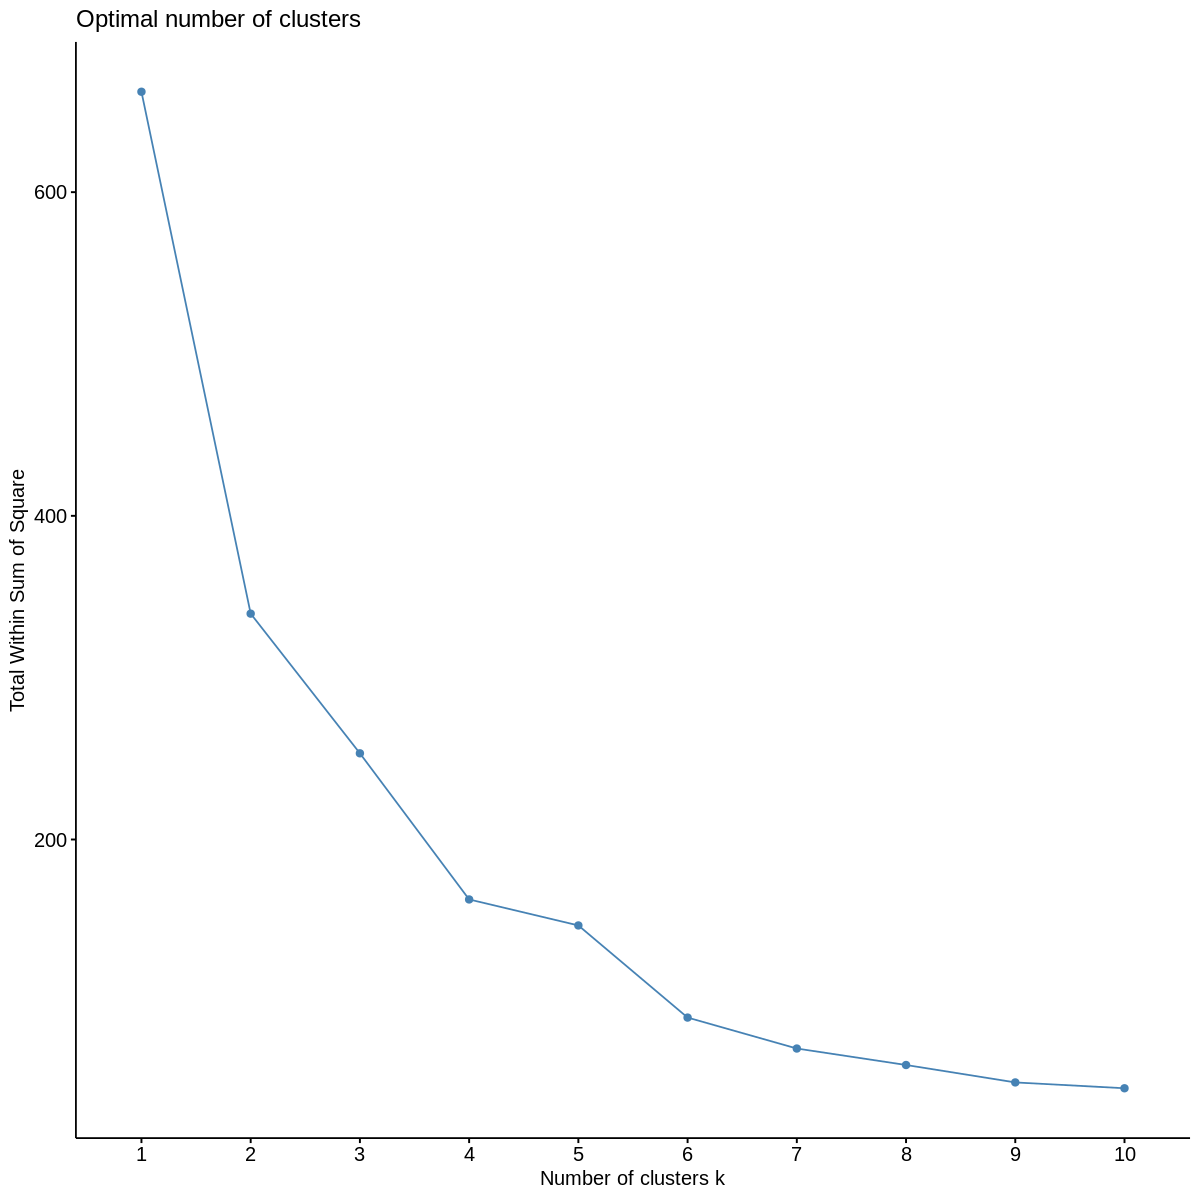

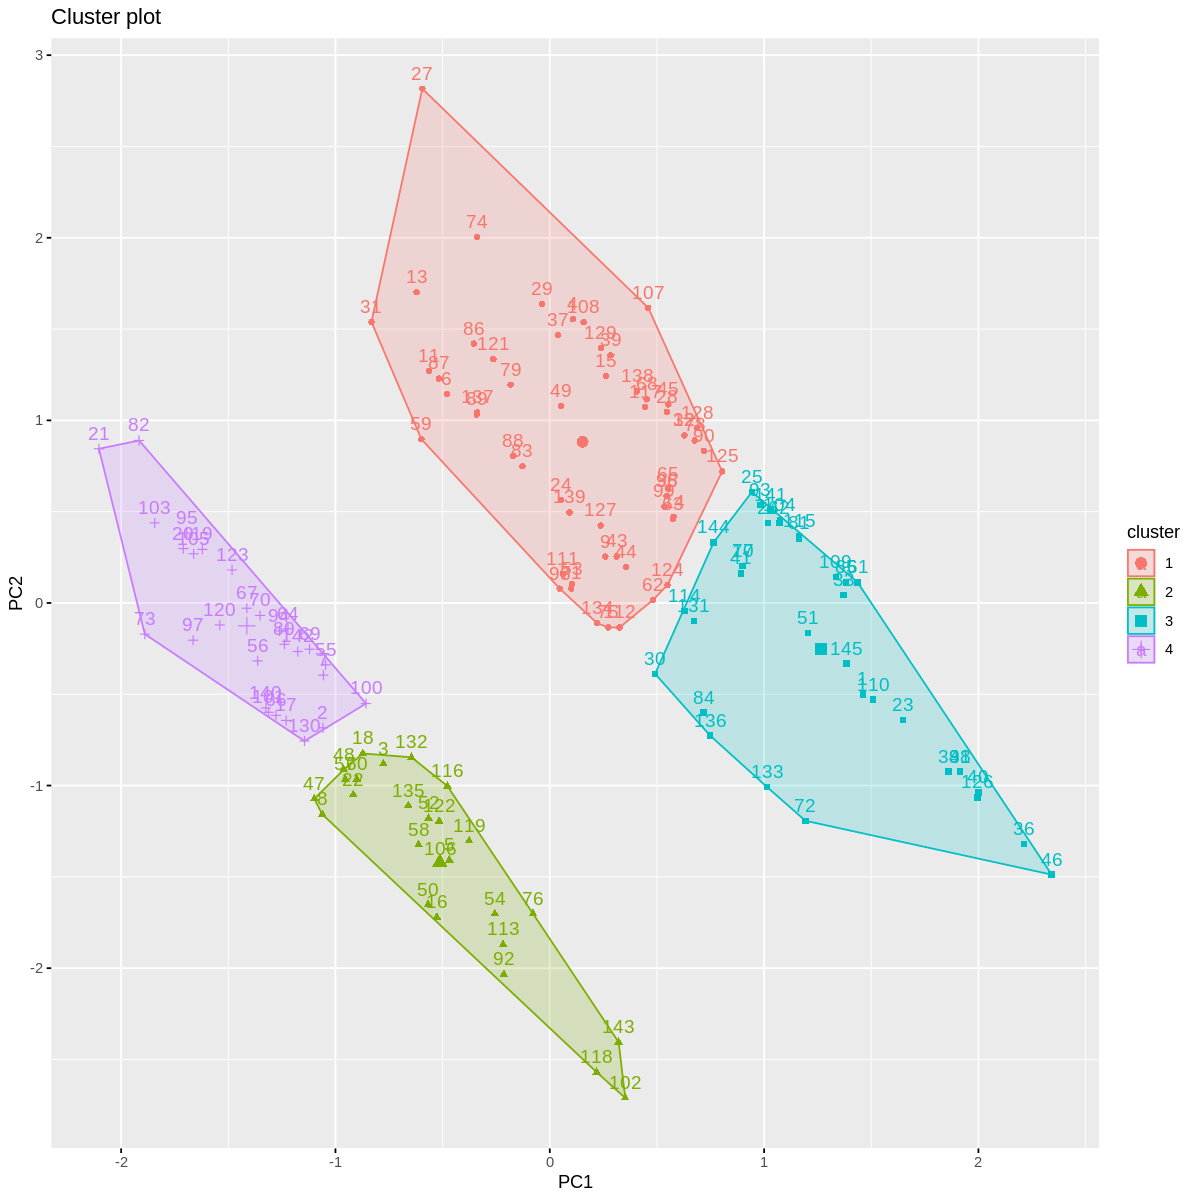

In [ ]:
#best attempt so far
options(repr.plot.width = 10, repr.plot.height =10)
features <- scale(features)
features <- prcomp(features, center = TRUE, scale = FALSE);
features
kmeans_transform <- as.data.frame(-features$x[,1:2])
fviz_nbclust(kmeans_transform, kmeans, method = 'wss')
kmeans_data <- kmeans(kmeans_transform, centers = 4, nstart = 50)
fviz_cluster(kmeans_data, data = kmeans_transform)

In [ ]:
#evaluation of clustering results 
kmeans_data

K-means clustering with 4 clusters of sizes 56, 26, 35, 28

Cluster means:
         PC1        PC2
1  0.2619485  1.1422886
2 -0.8769310 -1.8423165
3  2.1648014 -0.3292408
4 -2.4156057 -0.1623038

Clustering vector:
  [1] 3 4 2 1 2 1 4 2 1 3 1 1 1 1 1 2 4 2 4 4 4 2 3 1 3 3 1 1 1 3 1 1 3 3 1 3 1
 [38] 3 1 3 3 3 1 1 1 3 2 2 1 2 3 2 1 2 4 4 2 2 1 2 3 1 1 4 1 4 4 1 4 4 1 3 4 1
 [75] 1 2 3 1 1 4 3 4 1 3 3 1 1 1 1 1 3 2 3 4 4 1 4 1 1 4 4 2 4 3 4 2 1 1 3 3 1
[112] 1 2 3 3 2 1 2 2 4 1 2 4 1 1 3 1 1 1 4 3 2 3 1 2 3 1 1 1 4 3 4 2 3 3

Within cluster sum of squares by cluster:
[1] 60.45368 23.90240 44.37447 16.24110
 (between_SS / total_SS =  78.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

[1] "Clustering performance"


,PC1,PC2
1,0.2619485,1.1422886
2,-0.8769310,-1.8423165
3,2.1648014,-0.3292408
4,-2.4156057,-0.1623038


[1] 60.45368 23.90240 44.37447 16.24110

[1] 144.9716

NULL

The clustering using 4 centroids yielded 4 well defined clusters with between_SS / total_SS =  78.1 %. Prior experiments without using PCA yielded 33%, which suggests that PCA improved the results. 

**Report on results**

In [ ]:
# add cluster column to original data frame and inspect 
original <- original[original[,3] != "I am a graduate student",]
original["cluster"] = kmeans_data$cluster
head(original)

StudentIdentifier,Your gender:,What is your current academic classification?,What is your current cumulative GPA? (please answer with N/A if FALL 2022 is your first semester),"For sure you had an impression about AUI before joining the institution, how is your current feeling about AUI?","Please rate your feeling regarding SSE study experience in comparisons to what you heard about other AUI schools (1-> I am planning to change school, 2 -> I am OK with my school choice, 3 -> I am ...",How satisfied are you with the quality of the food served at AUI?,How satisfied are you with AUI housing facilities?,How would you rate AUI laboratory facilities?,How would you rate AUI parking facilities?,⋯,How would you rate the social life in AUI?,How do you rate the level of safety you feel on campus?,How would you rate the professors/teachers at AUI?,How would you rate the number of students/section?,How would you rate the sufficiency of offerings within programs of study?,How would you rate the convenience of class time slots?,"Overall, how would you rate the knowledge you are getting after attending a class?",What are 5 TOP (urgent) issues AUI has to work on?,Please include any important issues AUI has to work on.,cluster
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
student1,Male,Freshman (earned between 0-29 credits),N/A,I am happy to be an AUI student,3,Average Satisfaction,Very Satisfied,Satisfied,Satisfied,⋯,Average Satisfaction,Very Satisfied,Satisfied,Satisfied,Average Satisfaction,Average Satisfaction,Satisfied,Improve the food quality and work on variety;Work on the number of class offerings;Improve the Internet bandwidth;Engage more students in career opportunities;Enforce regulations as it is impossible to study nor work in the library or in a lab. ;,N/A,3
student2,Male,Junior (earned between 60-89 credits),3.12,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Very Satisfied,Satisfied,⋯,Satisfied,Very Satisfied,Satisfied,Not Satisfied,Average Satisfaction,Satisfied,Average Satisfaction,Students need to live on campus;Improve the food quality and work on variety;Improve the Internet bandwidth;Improve the service quality in the health center;Engage more students in career opportunities;,"We catch colds due to the heating systems In AUI, and also housing is just mediocre at this point.",4
student3,Male,Junior (earned between 60-89 credits),3.8,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Satisfied,Satisfied,⋯,Average Satisfaction,Very Satisfied,Average Satisfaction,Very Satisfied,Very Satisfied,Very Satisfied,Not Satisfied,Students need to live on campus;Improve the food quality and work on variety;Improve the Internet bandwidth;Engage more students in career opportunities;Reconsider policies used for hiring faculty and staff;,N/,2
student4,Male,Freshman (earned between 0-29 credits),N/A,I am disappointed/upset,2,Not Satisfied,Not Satisfied,Satisfied,Not Satisfied,⋯,Average Satisfaction,Very Satisfied,Average Satisfaction,Satisfied,Satisfied,Not Satisfied,Satisfied,Improve the food quality and work on variety;Engage more students in career opportunities;Better counseling and follow-up with students' progress;Reconsider policies used for hiring faculty and staff;Work on the number of class offerings;,For my perspective I see that living in campus is like a prison(you can't do a lot of things),1
student5,Female,Sophomore (earned between 30-59 credits),3.91,I am happy to be an AUI student,3,Average Satisfaction,Average Satisfaction,Satisfied,Not Satisfied,⋯,Satisfied,Very Satisfied,Satisfied,Average Satisfaction,Average Satisfaction,Satisfied,Satisfied,Improve the food quality and work on variety;Improve the Internet bandwidth;Transparency in decision making ;Reconsider policies used for hiring faculty and staff;Decrease the number of students per section;,Parking Crisis & INCOMPETENT New Faculty!!!!!,2
student6,Male,Freshman (earned between 0-2

In [ ]:
data["cluster"] <- kmeans_data$cluster

**Interpretation of results**

In [ ]:
#let's take a look at summary statistics per cluster 
first <- data[data["cluster"] == 1,]
second <- data[data["cluster"] == 2,]
third <- data[data["cluster"] == 3,]
fourth <- data[data["cluster"] == 4,]

In [ ]:
summary(first)

     female         male        freshman     junior      senior    sophomore
 Min.   :0.0   Min.   :0.0   Min.   :1   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0.0   1st Qu.:0.0   1st Qu.:1   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0.5   Median :0.5   Median :1   Median :0   Median :0   Median :0  
 Mean   :0.5   Mean   :0.5   Mean   :1   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:1.0   3rd Qu.:1.0   3rd Qu.:1   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :1.0   Max.   :1.0   Max.   :1   Max.   :0   Max.   :0   Max.   :0  
      gpa             impression    experience_rating      food      
 Min.   :-999.000   Min.   :1.000   Min.   :1.000     Min.   :1.000  
 1st Qu.:-999.000   1st Qu.:1.000   1st Qu.:2.000     1st Qu.:1.000  
 Median :-498.500   Median :2.000   Median :2.000     Median :1.000  
 Mean   :-497.715   Mean   :1.607   Mean   :2.161     Mean   :1.464  
 3rd Qu.:   3.357   3rd Qu.:2.000   3rd Qu.:3.000     3rd Qu.:2.000  
 Max.   :  12.000   Max.   :3.000   Max. 

In [ ]:
summary(second)

     female            male           freshman     junior      
 Min.   :0.0000   Min.   :0.0000   Min.   :0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :0   Median :1.0000  
 Mean   :0.4231   Mean   :0.5769   Mean   :0   Mean   :0.5385  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :0   Max.   :1.0000  
     senior         sophomore           gpa          impression   
 Min.   :0.0000   Min.   :0.0000   Min.   :2.700   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:3.377   1st Qu.:1.000  
 Median :0.0000   Median :0.0000   Median :3.735   Median :2.000  
 Mean   :0.2692   Mean   :0.1923   Mean   :3.603   Mean   :2.038  
 3rd Qu.:0.7500   3rd Qu.:0.0000   3rd Qu.:3.942   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :4.000   Max.   :3.000  
 experience_rating      food          housing           lab       
 Min.   :2.000  

In [ ]:
summary(third)

     female            male           freshman     junior      senior 
 Min.   :0.0000   Min.   :0.0000   Min.   :1   Min.   :0   Min.   :0  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1   1st Qu.:0   1st Qu.:0  
 Median :0.0000   Median :1.0000   Median :1   Median :0   Median :0  
 Mean   :0.4857   Mean   :0.5143   Mean   :1   Mean   :0   Mean   :0  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1   3rd Qu.:0   3rd Qu.:0  
 Max.   :1.0000   Max.   :1.0000   Max.   :1   Max.   :0   Max.   :0  
   sophomore      gpa           impression    experience_rating      food    
 Min.   :0   Min.   :-999.0   Min.   :2.000   Min.   :2.0       Min.   :1.0  
 1st Qu.:0   1st Qu.:-999.0   1st Qu.:2.000   1st Qu.:2.0       1st Qu.:1.0  
 Median :0   Median :-999.0   Median :3.000   Median :3.0       Median :2.0  
 Mean   :0   Mean   :-798.4   Mean   :2.714   Mean   :2.6       Mean   :1.8  
 3rd Qu.:0   3rd Qu.:-999.0   3rd Qu.:3.000   3rd Qu.:3.0       3rd Qu.:2.0  
 Max.   :0   Max.   :   5.0   Max. 

In [ ]:
summary(fourth)

     female            male           freshman     junior      
 Min.   :0.0000   Min.   :0.0000   Min.   :0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :0   Median :0.0000  
 Mean   :0.3571   Mean   :0.6429   Mean   :0   Mean   :0.1786  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :0   Max.   :1.0000  
     senior         sophomore           gpa          impression   
 Min.   :0.0000   Min.   :0.0000   Min.   :2.200   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:3.100   1st Qu.:1.000  
 Median :0.0000   Median :0.0000   Median :3.625   Median :1.000  
 Mean   :0.3929   Mean   :0.4286   Mean   :3.438   Mean   :1.214  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:3.902   3rd Qu.:1.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :4.000   Max.   :3.000  
 experience_rating      food          housing         lab       
 Min.   :1.000    

By analyzing the results above, we can make the following conclusions: 
1. Cluster 1 consists of only non-freshman students with a high concentration of juniors. This cluster shows relatively high satisfaction that we can see in both the means for services and academic satisfaction (2.786 and 2.59 respectively)
2. Cluster 2 consists 100% of non-freshman students (excluding graduates too) with a pretty balanced distribution between all the three standings (sophomores, juniors, and seniors). This cluster shows relatively low satisfaction that we can see in both the means for services and academic satisfaction (2.196 and 2.003 respectively).
3. Cluster 3 is 100% freshmen. This cluster shows relatively low satisfaction that is reflected in both the means for services and academic satisfaction (2.333 and 2.263 respectively).
4. Cluster 4 is 100% freshmen. This cluster shows relatively high satisfaction that is reflected in both the means for services and academic satisfaction (2.869 and  2.995 respectively).

We also notice that the average satisfaction among freshmen is higher than the one among non-freshmen students.

Finally, and as per the positioning of the clusters, we notice that the unsatisfied clusters are on the left, whereas the satisfied one are on the right. The latter means that PC1 mostly refers to the level of satisfaction. As per the vertical positioning, we notice that the nonfreshmen students tend to be higher, which signals that PC2 mostly refers to the seniority level.

**Act**

As a general trend, we can say that freshmen students, both male and female, are more satisfied than their older counterparts. The reduced satisfaction in older students might suggest that they eventually feel fed up/disappointed with the system (and here we can try to dig into the reasons from the data)